In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/american_bankruptcy.csv', sep=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [ ]:
# Check null
df.isnull().sum()

company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

## Some data adjust

In [ ]:
# Delete company_name column
df = df.drop(columns=['company_name'], axis=1)

# Rename "X" columns
df.rename(columns={
    'X1':'current_assets',
    'X2':'cost_of_goods_sold',
    'X3':'depreciation _and_amortization',
    'X4':'ebitda',
    'X5':'inventory',
    'X6':'net_income',
    'X7':'total_receivables',
    'X8':'market_value',
    'X9':'net_sales',
    'X10':'total_assets',
    'X11':'total_long_term_debt',
    'X12':'ebit',
    'X13':'gross_profit',
    'X14':'total_current_liabilities',
    'X15':'retained_earnings',
    'X16':'total_revenue',
    'X17':'total_liabilities',
    'X18':'total_operating_expenses'}, inplace = True)

# Recode and rename target
df['status_label'] = df['status_label'].apply(lambda x : 0 if x == 'alive' else 1)
df = df.rename(columns={'status_label':'bankruptcy'})

In [ ]:
df.columns

Index(['bankruptcy', 'year', 'current_assets', 'cost_of_goods_sold',
       'depreciation _and_amortization', 'ebitda', 'inventory', 'net_income',
       'total_receivables', 'market_value', 'net_sales', 'total_assets',
       'total_long_term_debt', 'ebit', 'gross_profit',
       'total_current_liabilities', 'retained_earnings', 'total_revenue',
       'total_liabilities', 'total_operating_expenses'],
      dtype='object')

## Create new features

In [ ]:
df['equity'] = df['total_assets']-df['total_liabilities']

In [ ]:
## Create financial ratios
df['current_ratio'] = df['current_assets']/df['total_current_liabilities']
df['net_margin'] = df['net_income']/df['total_revenue']
df['gross_margin'] = df['gross_profit']/df['total_revenue']
df['ebit_margin'] = df['ebit']/df['total_revenue']
df['ebitda_margin'] = df['ebitda']/df['total_revenue']
df['liabilities_to_assets'] = df['total_liabilities']/df['total_assets']
df['debt_to_assets'] = df['total_long_term_debt']/df['total_assets']
df['debt_to_equity'] = df['total_long_term_debt']/df['equity']
df['debt_to_liabilities'] = df['total_long_term_debt']/df['total_liabilities']
df['roa'] = df['net_income']/df['total_assets']
df['roe'] = df['net_income']/df['equity']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bankruptcy                      78682 non-null  int64  
 1   year                            78682 non-null  int64  
 2   current_assets                  78682 non-null  float64
 3   cost_of_goods_sold              78682 non-null  float64
 4   depreciation _and_amortization  78682 non-null  float64
 5   ebitda                          78682 non-null  float64
 6   inventory                       78682 non-null  float64
 7   net_income                      78682 non-null  float64
 8   total_receivables               78682 non-null  float64
 9   market_value                    78682 non-null  float64
 10  net_sales                       78682 non-null  float64
 11  total_assets                    78682 non-null  float64
 12  total_long_term_debt            

In [ ]:
# Keep only features created (ratios)
df = df.drop(df.columns[1:21], axis=1)

## Exploratory data analysis

In [ ]:
df.shape

(78682, 12)

In [ ]:
df.columns

Index(['bankruptcy', 'current_ratio', 'net_margin', 'gross_margin',
       'ebit_margin', 'ebitda_margin', 'liabilities_to_assets',
       'debt_to_assets', 'debt_to_equity', 'debt_to_liabilities', 'roa',
       'roe'],
      dtype='object')

bankruptcy
0    73462
1     5220
Name: count, dtype: int64

bankruptcy
0    0.933657
1    0.066343
Name: proportion, dtype: float64



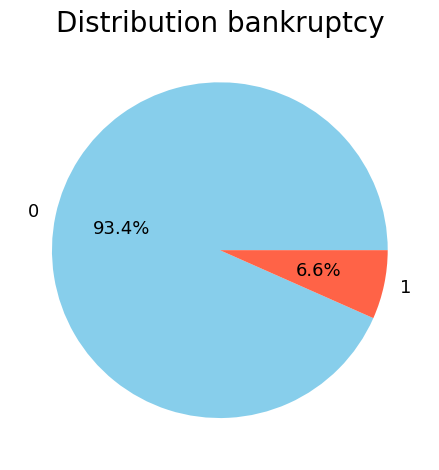

In [ ]:
## Target distribution
print(df['bankruptcy'].value_counts())
print('')
print(df['bankruptcy'].value_counts(normalize=True))
print('')

# Plot target distribution
df.groupby('bankruptcy').size().plot(kind='pie',
                                     autopct='%.1f%%',
                                     fontsize=13,
                                     colors=['skyblue', 'tomato'])

plt.title('Distribution bankruptcy', size=20)
plt.tight_layout()
plt.show()

Comments:
- Dataset presents an imbalance labels, as observed in our target, only 6.6% of the occasions correspond to 1 (bankruptcy).

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bankruptcy,78682.0,0.066343,0.248882,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
current_ratio,78682.0,3.491616,88.748428,-1.272131e+01,1.158053,1.897068,3.193725,2.410800e+04
net_margin,78682.0,-11.483463,279.732025,-3.254500e+04,-0.174473,0.015439,0.070352,1.542565e+03
gross_margin,78682.0,-6.320313,208.696267,-2.932570e+04,0.201613,0.349857,0.539486,3.582105e+02
ebit_margin,78682.0,-9.049968,219.541139,-3.017570e+04,-0.108286,0.042613,0.116947,3.944737e+02
ebitda_margin,78682.0,-8.676250,214.708115,-2.932570e+04,-0.044176,0.081687,0.171586,3.582105e+02
liabilities_to_assets,78682.0,1.923343,46.441906,4.051864e-05,0.302422,0.507032,0.710560,6.324000e+03
debt_to_assets,78682.0,0.266361,11.829246,-3.490137e-02,0.000000,0.101972,0.289877,3.287000e+03
debt_to_equity,78682.0,inf,NaN,-1.950500e+03,0.000000,0.101397,0.606637,inf
debt_to_liabilities,78682.0,0.269842,0.267201,-2.179682e-03,0.000000,0.216134,0.487664,1.191895e+00


In [ ]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Delete rows with NaN
df = df.dropna()

In [ ]:
## Delete potencial outliers: create subsample
# df = df[~((df[columns_out] < (Q1 - 1.5 * IQR)) | (df[columns_out] > (Q3 + 1.5 * IQR))).any(axis=1)]
q5 = df.quantile(0.05)
q95 = df.quantile(0.95)

filter = (df >= q5) & (df <= q95)
df_filt = df[filter]

In [ ]:
# Clean df_filt: delete NaN
df_filt = df_filt.dropna()

df.shape, df_filt.shape

((78680, 12), (48044, 12))

Comments:
- The traditional IQR was not used, by doing so the class imbalance was worsened, in fact there were no samples left where bankruptcy was present.
- By eliminating values ​​within the .05 and .95 percentile, the class imbalance is accentuated, but I consider it to be an acceptable magnitude.
- After eliminating outliers the samples fell from 78680 to 48044.

## Split data + SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop('bankruptcy', axis=1)
y = df['bankruptcy']

# Scaler X
scaler = MinMaxScaler()
Xsc= scaler.fit_transform(X)

In [ ]:
## Split data
X_train, X_test, y_train, y_test = train_test_split(Xsc,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=123)

In [ ]:
## SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=123)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print('Shape before SMOTE:')
print(X_train.shape, y_train.shape)
print('')
print('Shape after SMOTE:')
print(X_train_smote.shape, y_train_smote.shape)

Shape before SMOTE:
(55076, 11) (55076,)

Shape after SMOTE:
(66838, 11) (66838,)


y_train distribution before SMOTE:
bankruptcy
0    0.93351
1    0.06649
Name: proportion, dtype: float64

y_train distribution after SMOTE:
bankruptcy
0    0.769233
1    0.230767
Name: proportion, dtype: float64



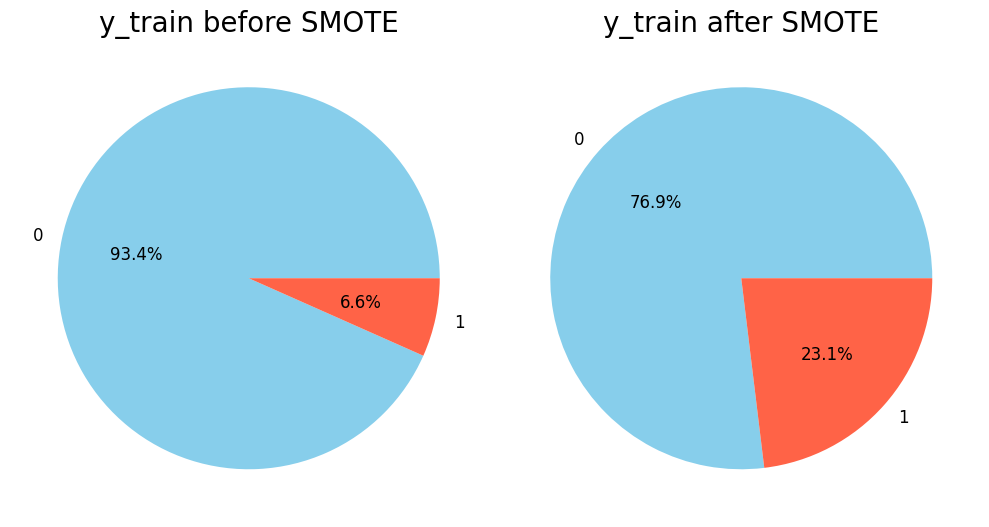

In [ ]:
print('y_train distribution before SMOTE:')
print(y_train.value_counts(normalize=True)) # Before SMOTE
print('')
print('y_train distribution after SMOTE:')
print(y_train_smote.value_counts(normalize=True)) # After SMOTE
print('')

## Plot
y_train_dist_before = y_train.value_counts(normalize=True)
y_train_dist_after = y_train_smote.value_counts(normalize=True)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot before SMOTE
axs[0].pie(y_train_dist_before,
           labels=y_train_dist_before.index,
           autopct='%1.1f%%',
           # startangle=90,
           textprops={'fontsize':12},
           colors=['skyblue', 'tomato'])
axs[0].set_title('y_train before SMOTE', size=20)

# Plot after SMOTE
axs[1].pie(y_train_dist_after,
           labels=y_train_dist_after.index,
           autopct='%1.1f%%',
           # startangle=90,
           textprops={'fontsize':12},
           colors=['skyblue', 'tomato'])
axs[1].set_title('y_train after SMOTE', size=20)

plt.tight_layout()
plt.show()

Comments:
- The distribution of y_train (bankruptcy) before applying SMOTE was approximately 93%-6% (0-1). After synthetic examples, or oversamples, are created, the distribution of y_train (y_train_smote) is close to 77%-23% (0-1).
- Remember that X is scaled.

## Apply classification models
- We will apply 2 models: SVM and XGBoost.
- We will not apply cross validation, time issues.

In [ ]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
## XGBoost
xgbCl = XGBClassifier(n_estimators=1500,
                      learning_rate=0.5,
                      max_depth=10,
                      random_state=123)

xgbCl.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1500, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [ ]:
y_xgbCl = xgbCl.predict(X_test)

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22047
           1       0.22      0.15      0.18      1557

    accuracy                           0.91     23604
   macro avg       0.58      0.56      0.57     23604
weighted avg       0.89      0.91      0.90     23604

[[21216   831]
 [ 1322   235]] 



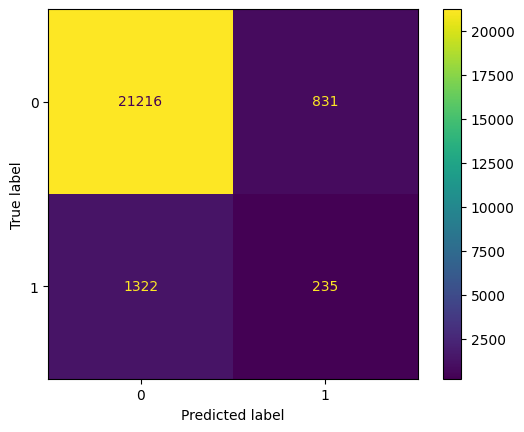

In [ ]:
print('Classification Report XGBoost:')
print(classification_report(y_test, y_xgbCl))

# Confusion Matrix
cm_xgbCl = confusion_matrix(y_test, y_xgbCl)

print(cm_xgbCl, '\n')
ConfusionMatrixDisplay(confusion_matrix=cm_xgbCl).plot();

In [ ]:
'''
## Cross validation SVM
from sklearn.model_selection import GridSearchCV

grid_param_svm = {'kernel':['linear', 'rbf'],
               'C':[0.0001, 1, 10],
               'gamma':[1, 10, 100]}

grid_search_svm = GridSearchCV(SVC(), grid_param_svm, cv=5)

grid_search_svm.fit(X_train_smote, y_train_smote)
'''

"\n## Cross validation SVM\nfrom sklearn.model_selection import GridSearchCV\n\ngrid_param_svm = {'kernel':['linear', 'rbf'], \n               'C':[0.0001, 1, 10], \n               'gamma':[1, 10, 100]}\n\ngrid_search_svm = GridSearchCV(SVC(), grid_param_svm, cv=5) \n\ngrid_search_svm.fit(X_train_smote, y_train_smote)\n"

In [ ]:
## Support Vector Machine
svc = SVC(C=10,
          gamma=10,
          kernel='rbf',
          random_state=123)

svc.fit(X_train_smote, y_train_smote)

SVC(C=10, gamma=10, random_state=123)

In [ ]:
y_svc = svc.predict(X_test)

Classification Report SVM:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     22047
           1       0.00      0.00      0.00      1557

    accuracy                           0.93     23604
   macro avg       0.47      0.50      0.48     23604
weighted avg       0.87      0.93      0.90     23604

[[22047     0]
 [ 1557     0]] 



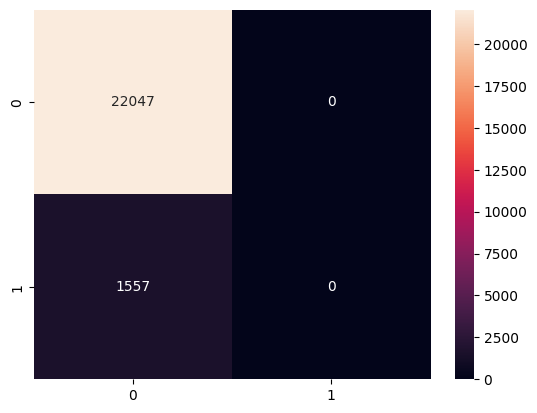

In [ ]:
print('Classification Report SVM:')
print(classification_report(y_test, y_svc))

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_svc)
print(cm_svc, '\n')
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.show()

Final comments:
- Getting financial ratios and using them for classification models does not provide accuracy in the metrics, at least in 1. Could be metter maintain inicial features.
- It could be improved with cross validation and/or appying other clasiffication models.